In [2]:
# Importamos librerías
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargamos los datos
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Limpiamos los datos
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Usamos una función de Pandas para transformar la columna de 'str' a 'datetime'
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Usamos un módulo de Python para transformar la columna de 'str' a 'list'

In [3]:
# Muestra del dataset.

df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
312529,Data Scientist,"Data Scientist, Product Analytics - Machine Le...","Frankfort, KY",via Lensa,Full-time,False,"Illinois, United States",2023-09-01 17:24:38,False,False,United States,None,NaN,NaN,Meta Inc,"[sql, python, r, spark, hadoop]","{'libraries': ['spark', 'hadoop'], 'programmin..."
698632,Business Analyst,"Business Intelligence Analyst, Marketing","Bogotá, Bogota, Colombia",via BeBee,Full-time,False,Colombia,2023-10-10 03:48:11,False,False,Colombia,None,NaN,NaN,"Turnitin, LLC","[sql, aws, snowflake, tableau, alteryx]","{'analyst_tools': ['tableau', 'alteryx'], 'clo..."
65561,Data Scientist,Data Scientist II,"Wyoming, MI",via Jobs Trabajo.org,Full-time,False,"New York, United States",2023-08-22 06:04:00,False,True,United States,None,NaN,NaN,Pacific Northwest National Laboratory,"[python, julia, c++, java, tensorflow, pytorch]","{'libraries': ['tensorflow', 'pytorch'], 'prog..."
752604,Data Engineer,IT Data Engineer - Logistiksysteme (d/m/w),"Vienna, Austria",via XING,Full-time,False,Austria,2023-01-30 20:30:34,True,False,Austria,None,NaN,NaN,Österreichische Post AG,"[sql, c#, azure, databricks]","{'cloud': ['azure', 'databricks'], 'programmin..."
203992,Data Engineer,Data Engineer,United Kingdom,via KSNT Jobs,Full-time,False,United Kingdom,2023-08-25 22:18:35,True,False,United Kingdom,None,NaN,NaN,INTEC SELECT LIMITED,"[sql, sql server, azure, databricks, ssis]","{'analyst_tools': ['ssis'], 'cloud': ['azure',..."


In [4]:
# Creamos un DataFrame que contenga sólo los trabajos ubicados en Argentina
df_ARG = df[(df['job_country'] == 'Argentina')]

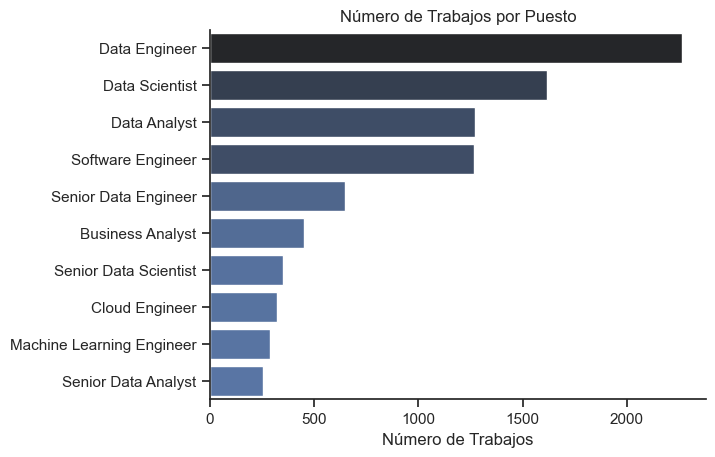

In [5]:
# Usamos la herramienta de Pandas que nos permite agrupar y ordenar los valores por popularidad
df_plot = df_ARG['job_title_short'].value_counts().to_frame()

# Con ayuda de Seaborn creamos una visualización personalizada
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Número de Trabajos por Puesto')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

In [ ]:
# Creamos un DataFrame en el que filtremos por nuestro trabajo de interés
job_name = 'Data Analyst'

df_job_ARG = df_ARG[df_ARG['job_title_short'] == job_name]

# Limpiamos la columna de ubicación donde se especifique Argentina como ciudad
df_job_ARG['job_location'] = df_job_ARG['job_location'].replace('Argentina', 'No Especifica')
df_job_ARG['job_location'] = df_job_ARG['job_location'].replace('Anywhere', 'Trabajo Remoto')

df_job_ARG

In [7]:
# Agrupamos y ordenamos según la ubicación

df_plot = df_job_ARG['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
"Buenos Aires, Argentina",630
No Especifica,398
Trabajo Remoto,88
"Córdoba, Córdoba Province, Argentina",30
"Córdoba, Cordoba, Argentina",17
"Olivos, Buenos Aires Province, Argentina",11
"Thames, Buenos Aires Province, Argentina",11
"Rosario, Santa Fe Province, Argentina",11
"Federal, Entre Rios, Argentina",8


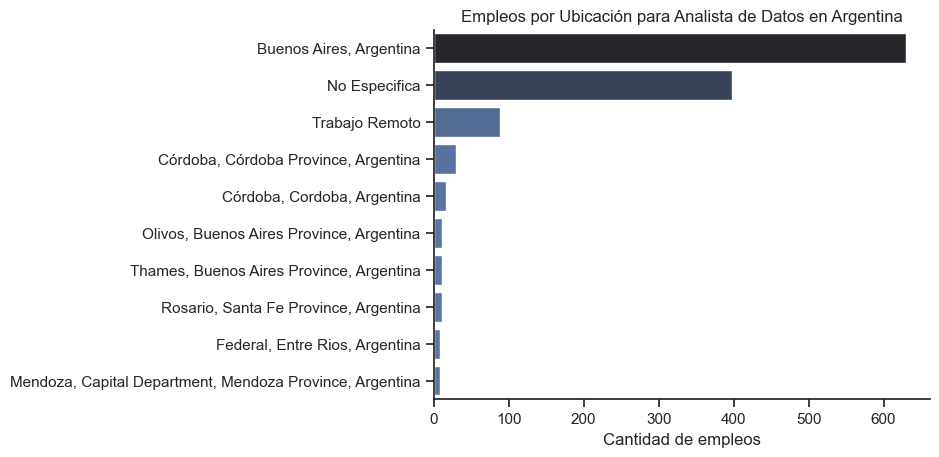

In [8]:
# Visualizamos la cantidad de empleo según cada ubicación.

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Empleos por Ubicación para Analista de Datos en Argentina')
plt.xlabel('Cantidad de empleos')
plt.ylabel('')
plt.show()

In [9]:
# Inspeccionamos para obtener una muestra de la cantidad de trabajos por empresa.
df_plot = df_job_ARG['company_name'].value_counts().to_frame().head()

df_plot

,count
company_name,
Emprego,474
Web:,22
Accenture,18
PwC Argentina,13
S&P Global,10


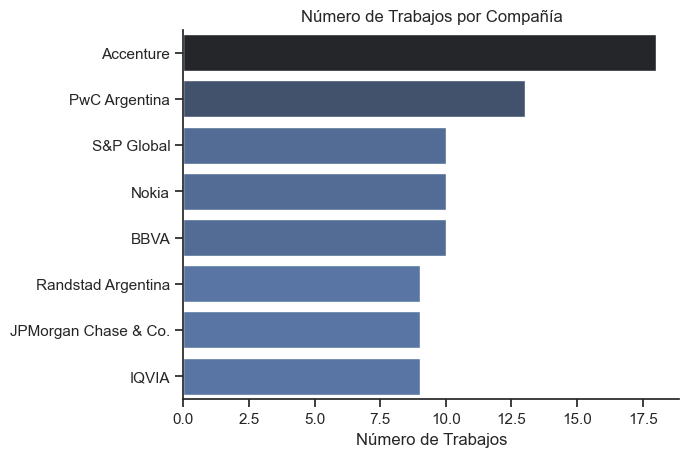

In [15]:
# Extraemos los primeros 2 elementos de la lista mediante slicing, dado que el primer resultado es una plataforma de reclutamiento y el segundo no es una empresa
## Creamos un df que contenga el top 8 de compañías con más avisos
df_plot = df_job_ARG['company_name'].value_counts().to_frame()[2:].head(8)

# Visualizamos la cantidad de trabajos según cada compañía
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Número de Trabajos por Compañía')
plt.xlabel('Número de Trabajos')
plt.ylabel('')
plt.show()

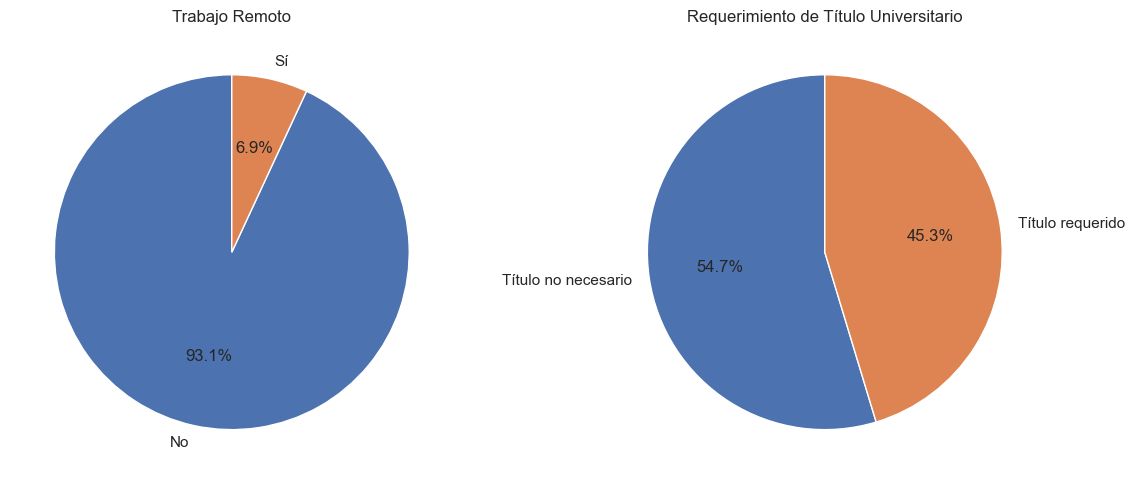

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

# Cuenta la cantidad de trabajos remotos
counts = df_job_ARG['job_work_from_home'].value_counts()

plt.subplot(1, 2, 1)
plt.pie(counts, labels=counts.index.map({False: 'No', True: 'Sí'}), autopct='%1.1f%%', startangle=90)
plt.title('Trabajo Remoto')

# Cuenta la cantidad de trabajos sin mención de título universitario
counts = df_job_ARG['job_no_degree_mention'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index.map({False: 'Título requerido', True: 'Título no necesario'}), autopct='%1.1f%%', startangle=90)
plt.title('Requerimiento de Título Universitario')

plt.tight_layout()
plt.show()